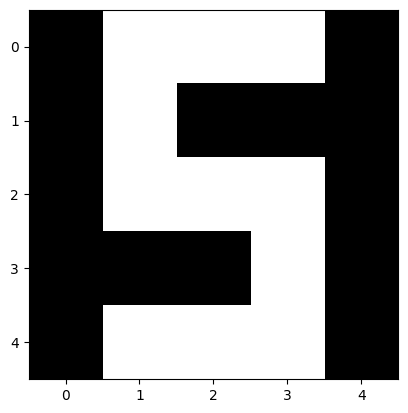

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

#!!! Run with CPU !!!#

image_5 = torch.tensor([
    [0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0]
], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

plt.imshow(image_5[0][0], cmap='gray')
plt.show()

In [16]:
class Flow(nn.Module):
  def __init__(self) -> None:
    super().__init__()

    self.time_embed = nn.Linear(1, 1)

    self.encoder = nn.Sequential(
        nn.Conv2d(1, 4, kernel_size=3, padding=1),
        nn.ELU(),
        nn.Conv2d(4, 4, kernel_size=3, padding=1),
        nn.ELU()
        )

    self.decoder = nn.ConvTranspose2d(4, 1, kernel_size=3, padding=1)

  def forward(self,  t: torch.Tensor, x: torch.Tensor) -> torch.Tensor:
    t_embed = self.time_embed(t.unsqueeze(-1).float())
    t_embed = t_embed.view(-1, 1, 1, 1)

    # START YOUR CODE
    x_t_combined = x  + t_embed
    x_encoded = self.encoder(x_t_combined)
    return self.decoder(x_encoded)
    # END YOUR CODE


In [20]:
torch.manual_seed(42)

model = Flow()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()

losses = []
steps = 100

x_1 = image_5
for step in range(steps):
    torch.manual_seed(42)
    optimizer.zero_grad()
    x_0 = torch.randn_like(x_1)
    t = torch.rand(1)
    if step == 0 :
      print(x_0)
      print(t)

    # START YOUR CODE
    target = x_1 - x_0
    x_t = (1 - t) * x_0 + t*x_1
    pred = model(t, x_t)
    # END YOUR CODE

    loss = loss_fn(pred, target)
    loss.backward()
    optimizer.step()
    if step == 99:
        losses += [loss.detach()]
        print(f"Step: {step}, loss: {loss.item()}")

tensor([[[[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784],
          [-1.2345, -0.0431, -1.6047, -0.7521, -0.6866],
          [-0.4934,  0.2415, -1.1109,  0.0915, -2.3169],
          [-0.2168, -1.3847, -0.3957,  0.8034, -0.6216],
          [-0.5920, -0.0631, -0.8286,  0.3309, -1.5576]]]])
tensor([0.3644])
Step: 99, loss: 2.769704587990418e-05


tensor([[[[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784],
          [-1.2345, -0.0431, -1.6047, -0.7521, -0.6866],
          [-0.4934,  0.2415, -1.1109,  0.0915, -2.3169],
          [-0.2168, -1.3847, -0.3957,  0.8034, -0.6216],
          [-0.5920, -0.0631, -0.8286,  0.3309, -1.5576]]]])


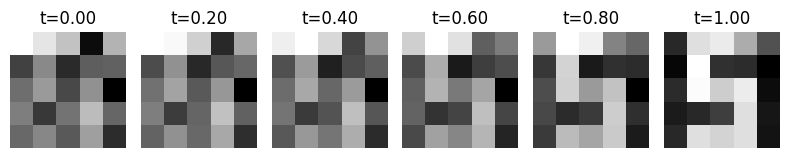

In [18]:
steps = 5
with torch.no_grad():
    torch.manual_seed(42)
    x_0 = torch.randn_like(x_1)
    print(x_0)
    t = torch.zeros(1)
    delta = 1/steps
    x_t = x_0
    list_x_t = [x_t]

    for i in range(steps):

        # START YOUR CODE
        x_t = x_t + delta*model(t, x_t)
        t = t + delta
        # END YOUR CODE

        list_x_t.append(x_t)

fig, axes = plt.subplots(1, len(list_x_t), figsize=(8, 3))
for i, x_t in enumerate(list_x_t):
    img = x_t.squeeze().detach().cpu().numpy()
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"t={i * delta:.2f}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

3
Step: 99, loss: 4.997672658646479e-05


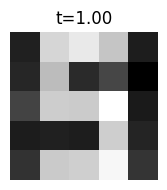

26
Step: 99, loss: 2.411683635727968e-05


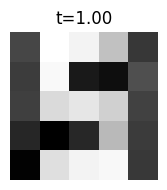

40
Step: 99, loss: 2.408127511444036e-05


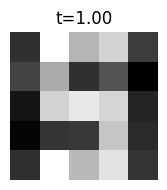

42
Step: 99, loss: 2.769704587990418e-05


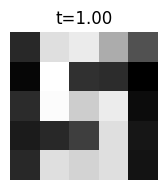

In [11]:
# Set 4 seed ---> 3, 26, 40, 42
# for i in [3,26,40,42]:
#     print(i)
#     torch.manual_seed(i)

#     model = Flow()

#     optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
#     loss_fn = nn.MSELoss()

#     losses = []
#     steps = 100

#     x_1 = image_5
#     for step in range(steps):
#         torch.manual_seed(i)
#         optimizer.zero_grad()
#         x_0 = torch.randn_like(x_1)
#         t = torch.rand(1)
#         # if step == 0:
#         #     print(x_0)

#         # START YOUR CODE
#         target = x_1 - x_0
#         x_t = (1 - t) * x_0 + t*x_1
#         pred = model(t, x_t)
#         # END YOUR CODE

#         loss = loss_fn(pred, target)
#         loss.backward()
#         optimizer.step()
#         if step == 99:
#             print(f"Step: {step}, loss: {loss.item()}")

#     steps = 5
#     with torch.no_grad():
#         torch.manual_seed(i)
#         x_0 = torch.randn_like(x_1)
#         # print(x_0)
#         t = torch.zeros(1)
#         delta = 1/steps
#         x_t = x_0
#         list_x_t = [x_t]

#         for i in range(steps):

#             # START YOUR CODE
#             x_t = x_t + delta*model(t, x_t)
#             t = t + delta
#             # END YOUR CODE

#             list_x_t.append(x_t)

#     fig, axes = plt.subplots(1, 1, figsize=(8, 2))
#     for i, x_t in enumerate(list_x_t):
#         if i == 5:
#             img = x_t.squeeze().detach().cpu().numpy()
#             axes.imshow(img, cmap='gray')
#             axes.set_title(f"t={i * delta:.2f}")
#             axes.axis('off')

#     plt.tight_layout()
#     plt.show()